# Visualization

Here I'll do some data viz to get a better understanding of my stuff

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

In [109]:
df = pd.read_csv('../data/nice_data.csv').dropna(subset=['Critic_Score'])
plots = pd.read_csv('../data/fsm_set.csv').drop('Unnamed: 0', axis=1)
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4400,Battlefield 2: Modern Combat,PS2,2005.0,Shooter,Electronic Arts,0.37,0.01,0.00,0.06,0.44,80.0,42.0,8.5,65.0,Digital Illusions,T
410,Assassin's Creed IV: Black Flag,X360,2013.0,Action,Ubisoft,1.90,1.11,0.01,0.29,3.30,86.0,35.0,7.9,701.0,Ubisoft,M
249,Tony Hawk's Pro Skater 3,PS2,2001.0,Sports,Activision,2.66,1.29,0.01,0.46,4.41,97.0,34.0,7.5,298.0,Neversoft Entertainment,T
4310,Dynasty Warriors: Strikeforce,PSP,2009.0,Action,Ubisoft Annecy,0.03,0.02,0.38,0.02,0.45,65.0,28.0,6.8,10.0,Omega Force,T
15485,RollerCoaster Tycoon World,PC,2016.0,Simulation,Atari,0.00,0.02,0.00,0.00,0.02,43.0,7.0,2.4,31.0,Nvizzio Creations,E
2562,Final Fantasy Anthology,PS,1999.0,Role-Playing,Square EA,0.45,0.30,0.00,0.05,0.80,80.0,14.0,8.1,28.0,SquareSoft,T
13526,Fantastic Four: Rise of the Silver Surfer,DS,2007.0,Action,Take-Two Interactive,0.04,0.00,0.00,0.00,0.04,35.0,8.0,4.8,13.0,7 Studios,E10+
4173,NBA Ballers: Phenom,PS2,2006.0,Sports,Midway Games,0.23,0.18,0.00,0.06,0.47,69.0,19.0,8.5,8.0,Midway,E
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
10069,Ring of Red,PS2,2000.0,Strategy,Konami Digital Entertainment,0.06,0.04,0.00,0.01,0.11,82.0,15.0,8.7,11.0,Konami,T


In [110]:
plots.sample()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,plots,success
3096,Siren,PS2,2003.0,Adventure,Sony Computer Entertainment,0.18,72.0,48.0,7.8,41.0,SCE Japan Studio,M,siren is set in a japanese village named hanud...,1


The first thing I'd like to see is if there is any kind of general correlation between game system and review score

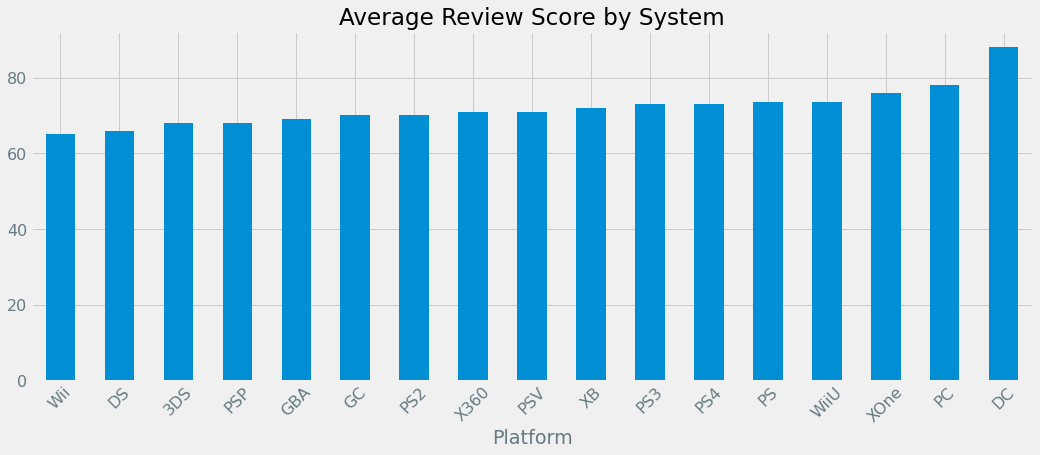

In [79]:
df.groupby('Platform')['Critic_Score'].median().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by System');

**Alright** looks like we have some kind of correlation

in some of these cases this difference is probably not statistically significant, because a few of these systems are only representing a few games total

### Brief time-series tangent

Curious to see the review scores over time

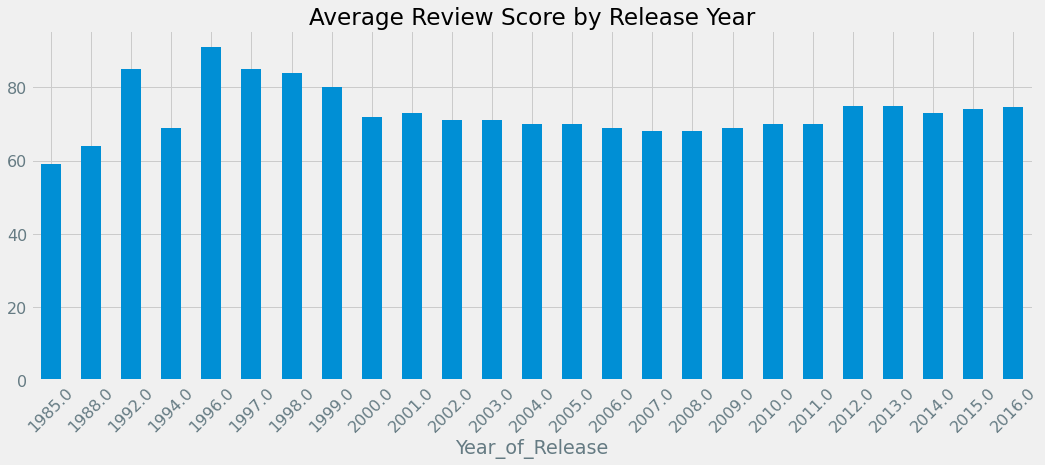

In [85]:
df.groupby('Year_of_Release')['Critic_Score'].median().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Release Year');

In [102]:
df[df.Year_of_Release == 1996]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
153,Tekken 2,PS,1996.0,Fighting,Sony Computer Entertainment,2.26,1.89,1.36,0.23,5.74,89.0,8.0,8.9,102.0,Namco,T
203,Resident Evil,PS,1996.0,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05,91.0,8.0,9,266.0,Capcom,M
229,Tomb Raider,PS,1996.0,Action,Eidos Interactive,2.29,1.97,0.13,0.24,4.63,91.0,13.0,8.6,147.0,Core Design Ltd.,T
903,PaRappa The Rapper,PS,1996.0,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,K-A
1160,Diablo,PC,1996.0,Role-Playing,Activision,0.01,1.58,0.00,0.00,1.59,94.0,12.0,8.7,850.0,Blizzard Entertainment,M
2014,Tomb Raider,PC,1996.0,Action,Eidos Interactive,0.96,0.07,0.00,0.00,1.03,86.0,18.0,8.5,3552.0,"Crystal Dynamics, Nixxes Software",M
6632,WipEout XL,PS,1996.0,Racing,Psygnosis,0.14,0.10,0.00,0.02,0.25,93.0,8.0,8.7,20.0,Psygnosis,NaN
9215,Super Puzzle Fighter II Turbo,PS,1996.0,Puzzle,Virgin Interactive,0.08,0.05,0.00,0.01,0.14,83.0,9.0,7.4,5.0,Capcom,E


In [104]:
df.Critic_Count.sum(), df.User_Count.sum()

(214498.0, 1216977.0)

In [105]:
df.Rating.value_counts()

E       2808
T       2640
M       1483
E10+    1118
RP         3
AO         1
K-A        1
Name: Rating, dtype: int64

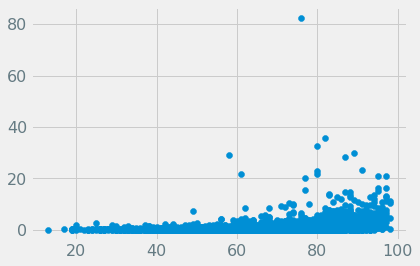

In [117]:
plt.scatter(df.Critic_Score, df.Global_Sales);

In [118]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.002386,0.050745,-0.026317,0.053747,0.020093,0.011411,0.223407,0.196867
NA_Sales,-0.002386,1.000000,0.840590,0.468787,0.728123,0.955705,0.240755,0.295413,0.244492
EU_Sales,0.050745,0.840590,1.000000,0.520103,0.718046,0.938926,0.220752,0.277533,0.282624
JP_Sales,-0.026317,0.468787,0.520103,1.000000,0.396889,0.613566,0.152593,0.180219,0.072427
Other_Sales,0.053747,0.728123,0.718046,0.396889,1.000000,0.805510,0.198554,0.251639,0.239171
Global_Sales,0.020093,0.955705,0.938926,0.613566,0.805510,1.000000,0.245471,0.303571,0.262935
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.196867,0.244492,0.282624,0.072427,0.239171,0.262935,0.264376,0.362334,1.000000


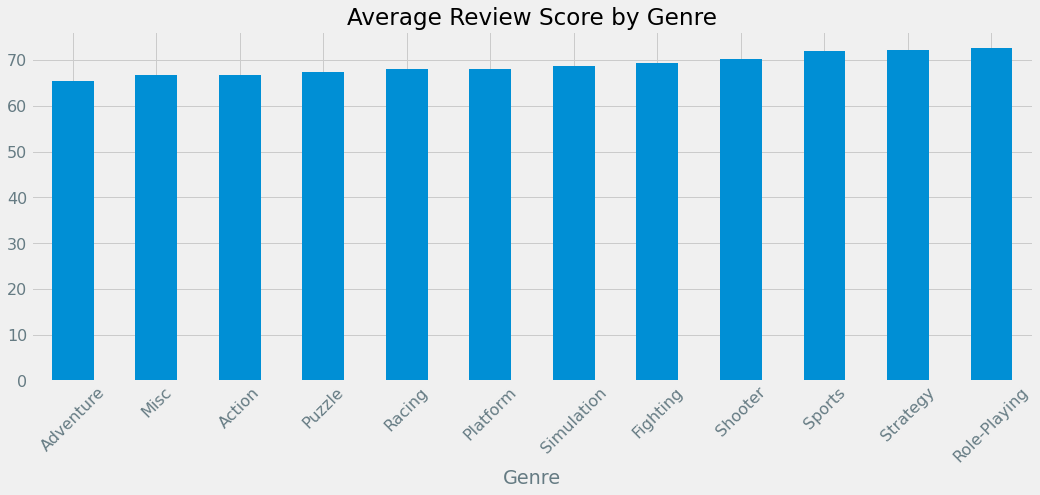

In [124]:
df.groupby('Genre')['Critic_Score'].mean().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Genre');